# Song Release Year Prediction Using Regression

## Final Term Project - Machine Learning

---

### Problem Description

In this project, we aim to predict the **release year of a song** based on its numerical audio features. This is a **regression task** where the target variable is continuous (representing years).

### Objective

- Build and evaluate multiple regression models (Machine Learning and Deep Learning)
- Compare model performances using standard regression metrics
- Select the best-performing model for predicting song release years

### Dataset

- **File**: `finalterm-regresi-dataset.csv`
- **Target Variable**: First column (Release Year)
- **Features**: Remaining columns (Numerical audio features)

---

## 2. Import Libraries

We import all necessary libraries for:
- **Data manipulation**: pandas, numpy
- **Visualization**: matplotlib, seaborn
- **Machine Learning**: scikit-learn
- **Deep Learning**: TensorFlow/Keras
- **Warnings handling**: warnings

In [1]:
# Data Manipulation
import polars as pl
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Machine Learning - Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Display settings
pl.Config.set_tbl_rows(10)
pl.Config.set_tbl_cols(10)
plt.style.use('seaborn-v0_8-whitegrid')

print("All libraries imported successfully!")
print(f"Polars version: {pl.__version__}")
print(f"TensorFlow version: {tf.__version__}")

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/

All libraries imported successfully!
Polars version: 1.33.1
TensorFlow version: 2.20.0


## 3. Load Dataset



In [2]:
# Load the dataset using Polars (much faster for large datasets)
df = pl.read_csv('finalterm-regresi-dataset.csv')

# Display basic information
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\nDataset Shape: {df.shape}")
print(f"   - Number of samples: {df.shape[0]}")
print(f"   - Number of features: {df.shape[1] - 1}")
print(f"   - Total columns: {df.shape[1]}")

print("\n" + "=" * 60)
print("COLUMN NAMES")
print("=" * 60)
print(f"\nFirst column (Target): {df.columns[0]}")
print(f"Feature columns: {df.columns[1:6]} ... (and more)")

print("\n" + "=" * 60)
print("FIRST 5 ROWS")
print("=" * 60)
df.head()

DATASET OVERVIEW

Dataset Shape: (515344, 91)
   - Number of samples: 515344
   - Number of features: 90
   - Total columns: 91

COLUMN NAMES

First column (Target): 2001
Feature columns: ['49.94357', '21.47114', '73.0775', '8.74861', '-17.40628'] ... (and more)

FIRST 5 ROWS


2001,49.94357,21.47114,73.0775,8.74861,…,-23.08793,68.40795,-1.82223,-27.46348,2.26327
i64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64
2001,48.73215,18.4293,70.32679,12.94636,…,-32.22788,70.49388,12.04941,58.43453,26.92061
2001,50.95714,31.85602,55.81851,13.41693,…,43.2013,-115.00698,-0.05859,39.67068,-0.66345
2001,48.2475,-1.89837,36.29772,2.58776,…,82.58061,-72.08993,9.90558,199.62971,18.85382
2001,50.9702,42.20998,67.09964,8.46791,…,-7.50035,51.76631,7.88713,55.66926,28.74903
2001,50.54767,0.31568,92.35066,22.38696,…,6.09352,35.18381,5.00283,-11.02257,0.02263


In [3]:
# Rename columns for clarity
# First column is target (release year), rest are features
original_columns = df.columns
new_columns = ['release_year'] + [f'feature_{i}' for i in range(1, len(df.columns))]
df = df.rename(dict(zip(original_columns, new_columns)))

print("Columns renamed for clarity")
print(f"\nTarget column: 'release_year'")
print(f"Feature columns: 'feature_1' to 'feature_{len(df.columns)-1}'")

# Display data types
print("\n" + "=" * 60)
print("DATA TYPES")
print("=" * 60)
print(df.schema)

Columns renamed for clarity

Target column: 'release_year'
Feature columns: 'feature_1' to 'feature_90'

DATA TYPES
Schema([('release_year', Int64), ('feature_1', Float64), ('feature_2', Float64), ('feature_3', Float64), ('feature_4', Float64), ('feature_5', Float64), ('feature_6', Float64), ('feature_7', Float64), ('feature_8', Float64), ('feature_9', Float64), ('feature_10', Float64), ('feature_11', Float64), ('feature_12', Float64), ('feature_13', Float64), ('feature_14', Float64), ('feature_15', Float64), ('feature_16', Float64), ('feature_17', Float64), ('feature_18', Float64), ('feature_19', Float64), ('feature_20', Float64), ('feature_21', Float64), ('feature_22', Float64), ('feature_23', Float64), ('feature_24', Float64), ('feature_25', Float64), ('feature_26', Float64), ('feature_27', Float64), ('feature_28', Float64), ('feature_29', Float64), ('feature_30', Float64), ('feature_31', Float64), ('feature_32', Float64), ('feature_33', Float64), ('feature_34', Float64), ('feature_

## 4. Exploratory Data Analysis (EDA)


In [4]:
# Summary Statistics
print("=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)
df.describe()

SUMMARY STATISTICS


statistic,release_year,feature_1,feature_2,feature_3,…,feature_86,feature_87,feature_88,feature_89,feature_90
str,f64,f64,f64,f64,…,f64,f64,f64,f64,f64
"""count""",515344.0,515344.0,515344.0,515344.0,…,515344.0,515344.0,515344.0,515344.0,515344.0
"""null_count""",0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0
"""mean""",1998.397077,43.387113,1.289515,8.658222,…,17.669292,-26.31552,4.458653,20.035229,1.329104
"""std""",10.931056,6.067557,51.580393,35.268505,…,114.428002,173.977455,13.346567,185.558415,22.088598
"""min""",1922.0,1.749,-337.0925,-301.00506,…,-3168.92457,-4319.99232,-236.03926,-7458.37815,-381.42443
"""25%""",1994.0,39.95469,-26.05952,-11.46271,…,-31.58061,-101.5303,-2.56609,-59.50927,-8.82021
"""50%""",2002.0,44.2585,8.41785,10.47632,…,15.59857,-21.20412,3.11765,7.76009,0.05305
"""75%""",2006.0,47.83387,36.12401,29.76464,…,67.79496,52.38932,9.96774,86.35161,9.67952
"""max""",2011.0,61.97014,384.06573,322.85143,…,3662.06565,2833.60895,463.4195,7393.39844,677.89963


TARGET VARIABLE ANALYSIS (Release Year)

Minimum Year: 1922
Maximum Year: 2011
Mean Year: 1998.40
Median Year: 2002
Standard Deviation: 10.93


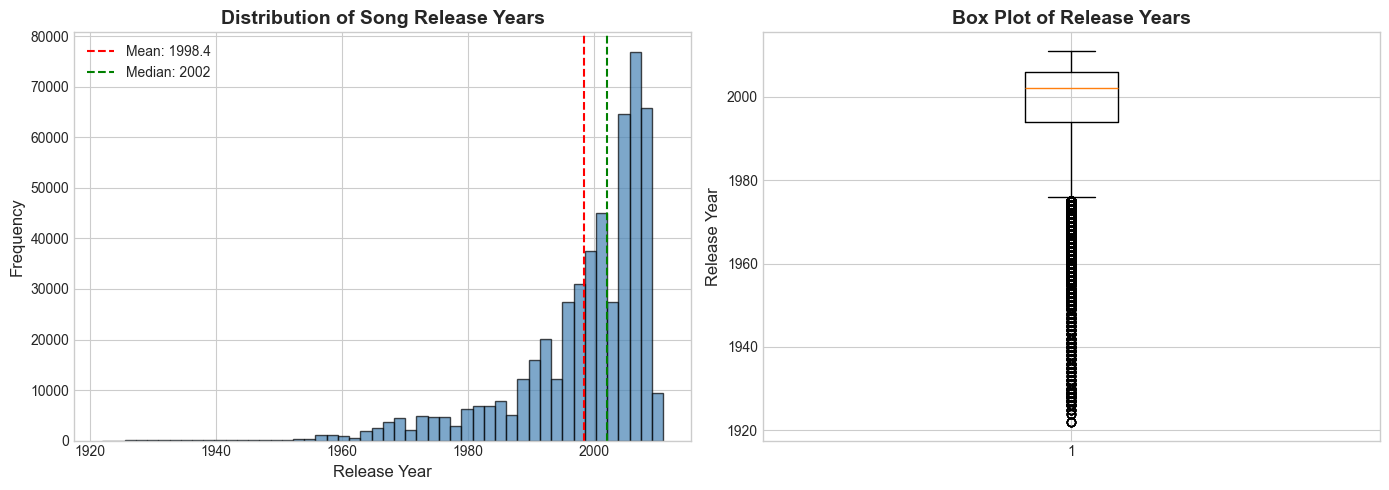


Observation: The target variable shows the distribution of song release years in the dataset.


In [5]:
# Target Variable Analysis
print("=" * 60)
print("TARGET VARIABLE ANALYSIS (Release Year)")
print("=" * 60)

target_stats = df.select('release_year').describe()
release_year = df['release_year']

print(f"\nMinimum Year: {release_year.min():.0f}")
print(f"Maximum Year: {release_year.max():.0f}")
print(f"Mean Year: {release_year.mean():.2f}")
print(f"Median Year: {release_year.median():.0f}")
print(f"Standard Deviation: {release_year.std():.2f}")

# Convert to numpy for visualization
release_year_np = release_year.to_numpy()

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(release_year_np, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Release Year', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Song Release Years', fontsize=14, fontweight='bold')
axes[0].axvline(release_year.mean(), color='red', linestyle='--', label=f'Mean: {release_year.mean():.1f}')
axes[0].axvline(release_year.median(), color='green', linestyle='--', label=f'Median: {release_year.median():.0f}')
axes[0].legend()

# Box plot
axes[1].boxplot(release_year_np, vert=True)
axes[1].set_ylabel('Release Year', fontsize=12)
axes[1].set_title('Box Plot of Release Years', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nObservation: The target variable shows the distribution of song release years in the dataset.")

FEATURE DISTRIBUTION OVERVIEW


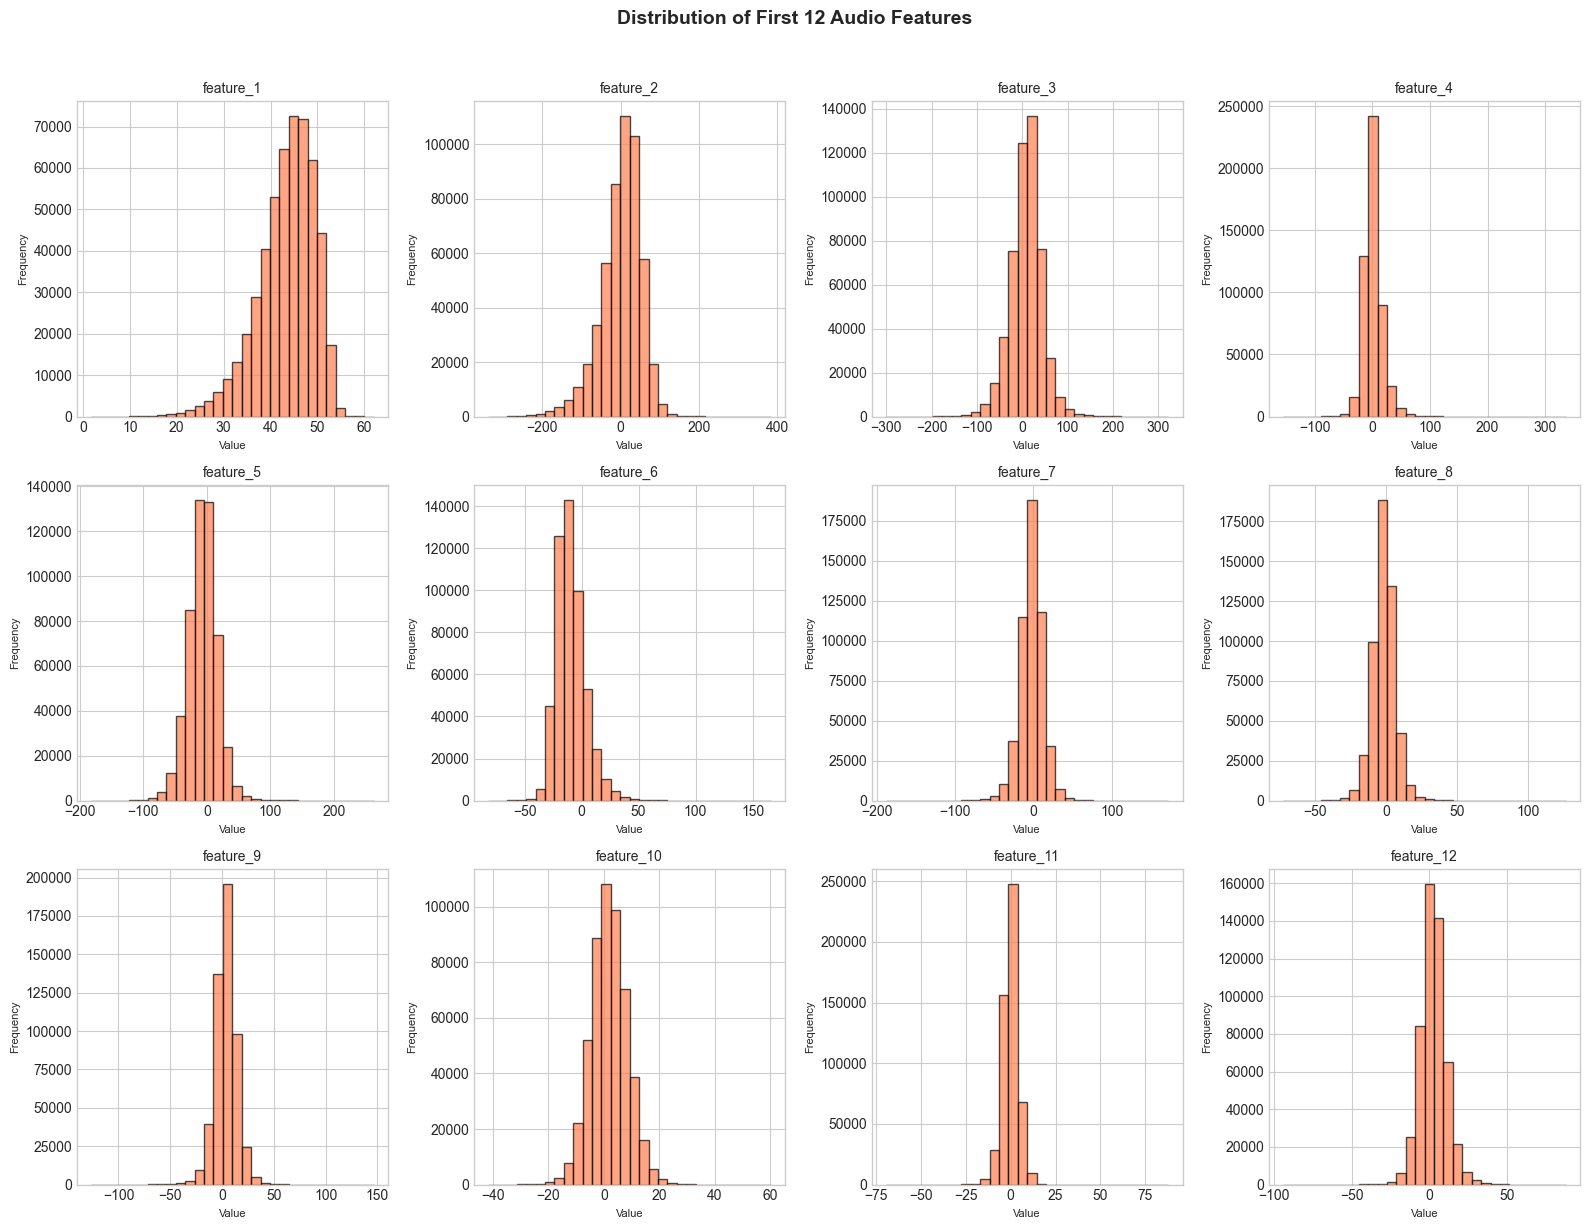


Observation: Features show various distributions. Some features may require scaling.


In [6]:
# Feature Distribution Overview
print("=" * 60)
print("FEATURE DISTRIBUTION OVERVIEW")
print("=" * 60)

# Select first 12 features for visualization
feature_cols = [col for col in df.columns if col.startswith('feature_')]
sample_features = feature_cols[:12]

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(sample_features):
    axes[i].hist(df[feature].to_numpy(), bins=30, edgecolor='black', alpha=0.7, color='coral')
    axes[i].set_title(f'{feature}', fontsize=10)
    axes[i].set_xlabel('Value', fontsize=8)
    axes[i].set_ylabel('Frequency', fontsize=8)

plt.suptitle('Distribution of First 12 Audio Features', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nObservation: Features show various distributions. Some features may require scaling.")

In [7]:
# Missing Value Inspection
print("=" * 60)
print("MISSING VALUE INSPECTION")
print("=" * 60)

# Count null values per column using Polars
null_counts = df.null_count()
total_rows = df.shape[0]

# Create a summary
missing_info = pl.DataFrame({
    'Column': df.columns,
    'Missing_Count': [null_counts[col][0] for col in df.columns],
    'Missing_Percentage': [(null_counts[col][0] / total_rows) * 100 for col in df.columns]
})

# Filter columns with missing values
missing_with_nulls = missing_info.filter(pl.col('Missing_Count') > 0)

if missing_with_nulls.shape[0] > 0:
    print("\nColumns with missing values:")
    print(missing_with_nulls)
else:
    print("\nNo missing values found in the dataset!")
    
# Total missing values
total_missing = sum([null_counts[col][0] for col in df.columns])
print(f"\nTotal missing values: {total_missing}")
print(f"Total cells in dataset: {df.shape[0] * df.shape[1]}")

MISSING VALUE INSPECTION

No missing values found in the dataset!

Total missing values: 0
Total cells in dataset: 46896304


CORRELATION ANALYSIS WITH TARGET

Top 10 Features Most Correlated with Release Year:
----------------------------------------
feature_1     0.225373
feature_6    -0.187443
feature_3    -0.139542
feature_63   -0.126348
feature_40   -0.123975
feature_7     0.110461
feature_67   -0.102841
feature_46   -0.101324
feature_36   -0.101006
feature_69   -0.099484
Name: release_year, dtype: float64

Bottom 10 Features Least Correlated with Release Year:
----------------------------------------
feature_15   -0.007228
feature_56    0.007192
feature_71   -0.006024
feature_58   -0.004997
feature_80   -0.004891
feature_19   -0.004511
feature_4    -0.003286
feature_82    0.002492
feature_64    0.000396
feature_43   -0.000375
Name: release_year, dtype: float64


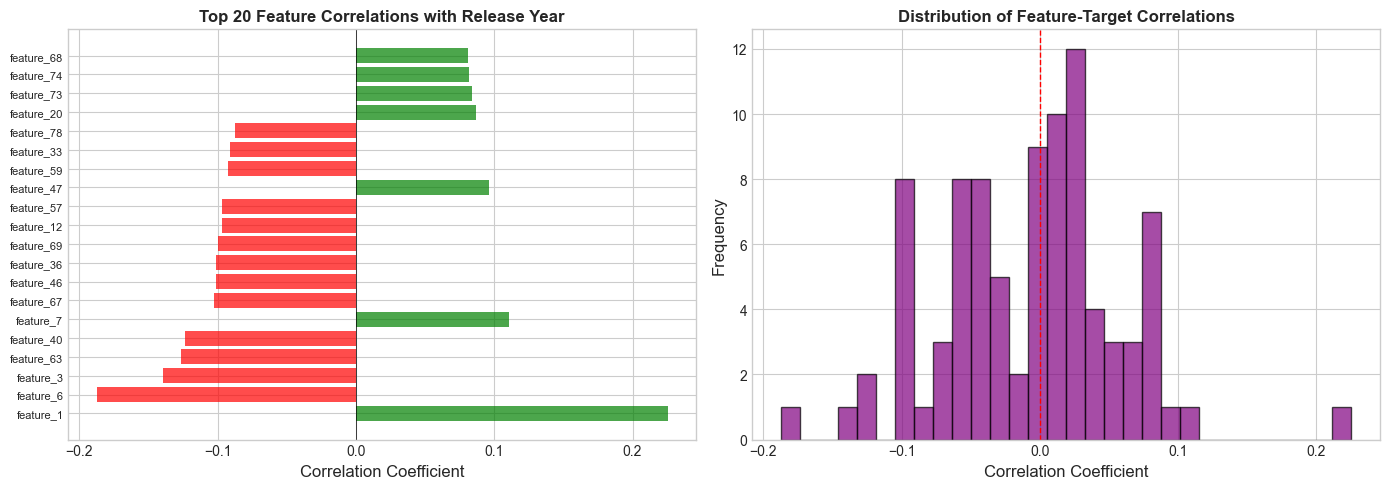


Observation: Most features have weak correlations with the target, suggesting a complex non-linear relationship.


In [8]:
# Correlation Analysis with Target
print("=" * 60)
print("CORRELATION ANALYSIS WITH TARGET")
print("=" * 60)

# Calculate correlations with target using Polars
# Convert to pandas temporarily for correlation calculation (more efficient for this operation)
df_pd = df.to_pandas()
correlations = df_pd.corr()['release_year'].drop('release_year').sort_values(key=abs, ascending=False)

print("\nTop 10 Features Most Correlated with Release Year:")
print("-" * 40)
print(correlations.head(10))

print("\nBottom 10 Features Least Correlated with Release Year:")
print("-" * 40)
print(correlations.tail(10))

# Visualize top correlations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Top positive and negative correlations
top_corr = correlations.head(20)
colors = ['green' if x > 0 else 'red' for x in top_corr.values]
axes[0].barh(range(len(top_corr)), top_corr.values, color=colors, alpha=0.7)
axes[0].set_yticks(range(len(top_corr)))
axes[0].set_yticklabels(top_corr.index, fontsize=8)
axes[0].set_xlabel('Correlation Coefficient', fontsize=12)
axes[0].set_title('Top 20 Feature Correlations with Release Year', fontsize=12, fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# Correlation distribution
axes[1].hist(correlations.values, bins=30, edgecolor='black', alpha=0.7, color='purple')
axes[1].set_xlabel('Correlation Coefficient', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Feature-Target Correlations', fontsize=12, fontweight='bold')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

print("\nObservation: Most features have weak correlations with the target, suggesting a complex non-linear relationship.")

## 5. Data Preprocessing


In [9]:
# 5.1 Handle Missing Values
print("=" * 60)
print("HANDLING MISSING VALUES")
print("=" * 60)

# Check for missing values
null_counts = df.null_count()
missing_before = sum([null_counts[col][0] for col in df.columns])
print(f"\nMissing values before handling: {missing_before}")

# If there are missing values, fill with median (robust to outliers)
if missing_before > 0:
    for col in df.columns:
        if null_counts[col][0] > 0:
            median_val = df[col].median()
            df = df.with_columns(pl.col(col).fill_null(median_val))
            print(f"  - Filled '{col}' with median: {median_val:.4f}")

null_counts_after = df.null_count()
missing_after = sum([null_counts_after[col][0] for col in df.columns])
print(f"\nMissing values after handling: {missing_after}")

HANDLING MISSING VALUES

Missing values before handling: 0

Missing values after handling: 0


In [10]:
# 5.2 Outlier Detection and Handling
print("=" * 60)
print("OUTLIER DETECTION AND HANDLING")
print("=" * 60)

# Separate features and target
feature_cols = [col for col in df.columns if col != 'release_year']
X = df.select(feature_cols)
y = df['release_year']

# Function to detect outliers using IQR method with Polars
def count_outliers_iqr(series, threshold=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Count outliers per feature
outlier_counts = {col: count_outliers_iqr(X[col]) for col in X.columns}
outlier_series = pd.Series(outlier_counts).sort_values(ascending=False)

print(f"\nFeatures with most outliers (top 10):")
print(outlier_series.head(10))

# Clip outliers using Z-score method with Polars (vectorized, very fast)
def clip_outliers_polars(df, threshold=3):
    """Clip outliers using Z-score method - Polars vectorized"""
    clipped_exprs = []
    for col in df.columns:
        mean_val = df[col].mean()
        std_val = df[col].std()
        lower = mean_val - threshold * std_val
        upper = mean_val + threshold * std_val
        clipped_exprs.append(pl.col(col).clip(lower, upper))
    return df.select(clipped_exprs)

# Apply clipping to features
X_clipped = clip_outliers_polars(X)

print(f"\nOutliers handled using Z-score clipping (threshold = 3 std)")
print(f"   Original shape: {X.shape}")
print(f"   After clipping: {X_clipped.shape}")

OUTLIER DETECTION AND HANDLING

Features with most outliers (top 10):
feature_68    46753
feature_37    46192
feature_27    45593
feature_46    42450
feature_25    41997
feature_26    40195
feature_77    39713
feature_90    39477
feature_70    39290
feature_89    39148
dtype: int64

Outliers handled using Z-score clipping (threshold = 3 std)
   Original shape: (515344, 90)
   After clipping: (515344, 90)


In [11]:
# 5.3 Feature Scaling
print("=" * 60)
print("FEATURE SCALING")
print("=" * 60)

# Convert Polars to numpy for sklearn StandardScaler
X_clipped_np = X_clipped.to_numpy()

# Use StandardScaler for better performance with most ML algorithms
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clipped_np)

# Convert back to Polars DataFrame for consistency
X_scaled_pl = pl.DataFrame(X_scaled, schema=X_clipped.columns)

# Also keep as pandas DataFrame for sklearn compatibility later
X_scaled_df = pd.DataFrame(X_scaled, columns=X_clipped.columns)

print(f"\nFeatures scaled using StandardScaler")
print(f"   - Method: Standardization (Z-score normalization)")
print(f"   - Formula: (x - mean) / std")

# Verify scaling
print(f"\nScaled features statistics:")
print(f"   Mean (should be ~0): {X_scaled_pl.mean().to_numpy().mean():.6f}")
print(f"   Std (should be ~1): {X_scaled_pl.std().to_numpy().mean():.6f}")

FEATURE SCALING

Features scaled using StandardScaler
   - Method: Standardization (Z-score normalization)
   - Formula: (x - mean) / std

Scaled features statistics:
   Mean (should be ~0): -0.000000
   Std (should be ~1): 1.000001


In [12]:
# 5.4 Train-Test Split
print("=" * 60)
print("DATA SPLITTING")
print("=" * 60)

# Convert target to numpy/pandas for sklearn compatibility
y_np = y.to_numpy()

# Split data into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled_df, y_np, 
    test_size=0.2, 
    random_state=42
)

# Convert y to pandas Series for easier handling
y_train = pd.Series(y_train, name='release_year')
y_val = pd.Series(y_val, name='release_year')

print(f"\nData split completed!")
print(f"\nTraining Set:")
print(f"   - Samples: {X_train.shape[0]}")
print(f"   - Features: {X_train.shape[1]}")

print(f"\nValidation Set:")
print(f"   - Samples: {X_val.shape[0]}")
print(f"   - Features: {X_val.shape[1]}")

print(f"\nTarget Variable Distribution:")
print(f"   - Training mean: {y_train.mean():.2f}")
print(f"   - Validation mean: {y_val.mean():.2f}")

DATA SPLITTING

Data split completed!

Training Set:
   - Samples: 412275
   - Features: 90

Validation Set:
   - Samples: 103069
   - Features: 90

Target Variable Distribution:
   - Training mean: 1998.38
   - Validation mean: 1998.45


## 6. Feature Selection / Engineering


In [13]:
# 6.1 Feature Selection using SelectKBest with F-regression
print("=" * 60)
print("FEATURE SELECTION")
print("=" * 60)

# Apply SelectKBest with f_regression scoring
k_features = min(50, X_train.shape[1])  # Select top 50 features or all if less
selector = SelectKBest(score_func=f_regression, k=k_features)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

# Get selected feature names - using Polars for fast DataFrame creation
feature_scores = pl.DataFrame({
    'Feature': X_train.columns.tolist(),
    'F_Score': selector.scores_.tolist(),
    'P_Value': selector.pvalues_.tolist()
}).sort('F_Score', descending=True)

print(f"\nFeature Selection Results (Top {k_features} features):")
print(f"   - Original features: {X_train.shape[1]}")
print(f"   - Selected features: {X_train_selected.shape[1]}")

print(f"\nTop 15 Most Important Features:")
print("-" * 50)
print(feature_scores.head(15))

# Get mask of selected features
selected_mask = selector.get_support()
selected_features = [col for col, mask in zip(X_train.columns, selected_mask) if mask]

print(f"\nFeature selection completed using F-regression scoring")

FEATURE SELECTION

Feature Selection Results (Top 50 features):
   - Original features: 90
   - Selected features: 50

Top 15 Most Important Features:
--------------------------------------------------
shape: (15, 3)
┌────────────┬──────────────┬─────────┐
│ Feature    ┆ F_Score      ┆ P_Value │
│ ---        ┆ ---          ┆ ---     │
│ str        ┆ f64          ┆ f64     │
╞════════════╪══════════════╪═════════╡
│ feature_1  ┆ 22705.072477 ┆ 0.0     │
│ feature_6  ┆ 15721.186492 ┆ 0.0     │
│ feature_3  ┆ 8469.051081  ┆ 0.0     │
│ feature_63 ┆ 7589.280284  ┆ 0.0     │
│ feature_40 ┆ 7504.885135  ┆ 0.0     │
│ …          ┆ …            ┆ …       │
│ feature_47 ┆ 4822.780568  ┆ 0.0     │
│ feature_36 ┆ 4757.395099  ┆ 0.0     │
│ feature_59 ┆ 4341.191005  ┆ 0.0     │
│ feature_33 ┆ 4201.005532  ┆ 0.0     │
│ feature_12 ┆ 4151.074458  ┆ 0.0     │
└────────────┴──────────────┴─────────┘

Feature selection completed using F-regression scoring


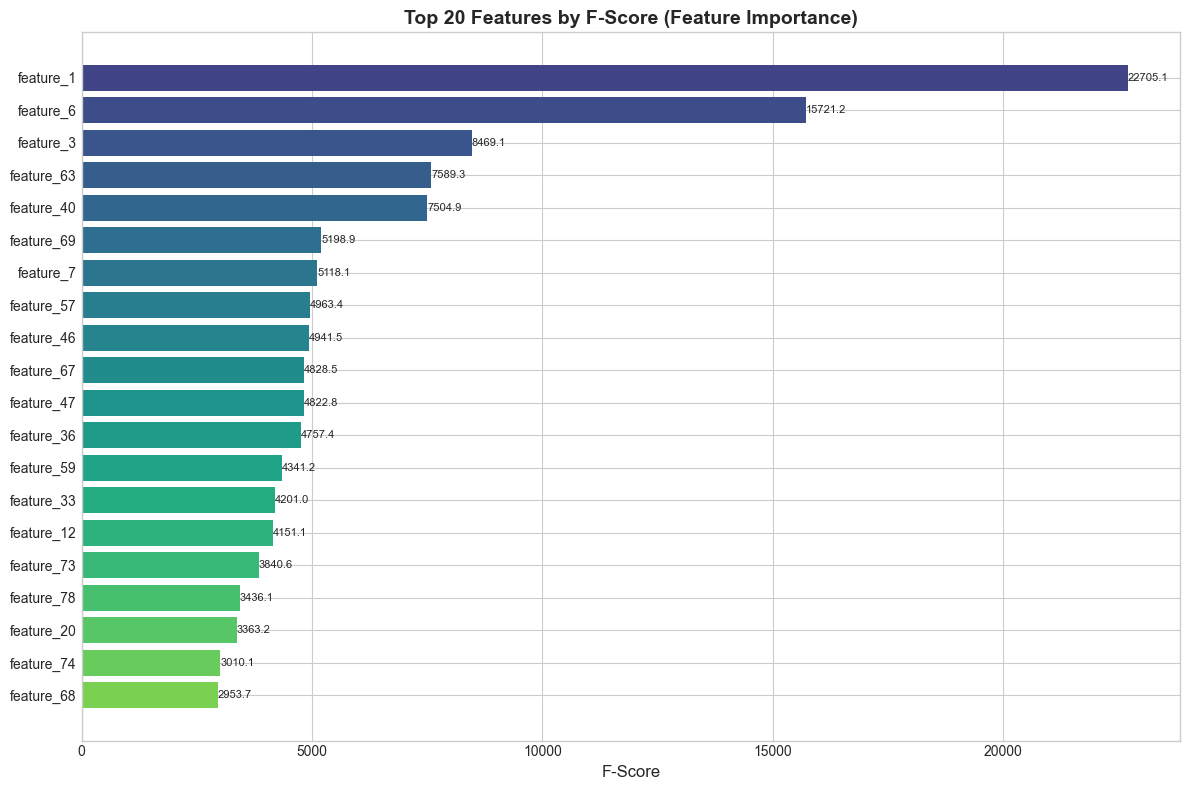


Note: Higher F-scores indicate stronger relationships with the target variable.


In [14]:
# 6.2 Visualize Feature Importance
fig, ax = plt.subplots(figsize=(12, 8))

top_20_features = feature_scores.head(20)
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_20_features)))

bars = ax.barh(range(len(top_20_features)), top_20_features['F_Score'].to_numpy(), color=colors)
ax.set_yticks(range(len(top_20_features)))
ax.set_yticklabels(top_20_features['Feature'].to_list())
ax.set_xlabel('F-Score', fontsize=12)
ax.set_title('Top 20 Features by F-Score (Feature Importance)', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Add value labels
for i, (bar, score) in enumerate(zip(bars, top_20_features['F_Score'].to_numpy())):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{score:.1f}', va='center', fontsize=8)

plt.tight_layout()
plt.show()

print("\nNote: Higher F-scores indicate stronger relationships with the target variable.")

## 7. Machine Learning Regression Models

In this section, we will train and evaluate multiple regression models:
1. **Linear Regression** - Baseline model
2. **Ridge Regression** - L2 regularization
3. **Random Forest Regressor** - Ensemble tree-based model
4. **Gradient Boosting Regressor** - Boosting ensemble model

Each model will be evaluated using:
- **MSE** (Mean Squared Error)
- **RMSE** (Root Mean Squared Error)
- **MAE** (Mean Absolute Error)
- **R2 Score** (Coefficient of Determination)

In [15]:
# Helper function to evaluate regression models
def evaluate_model(model, X_train, X_val, y_train, y_val, model_name):
    """
    Evaluate a regression model and return metrics
    """
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics for training set
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Calculate metrics for validation set
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    # Print results
    print(f"\n{'='*60}")
    print(f"{model_name} - EVALUATION RESULTS")
    print(f"{'='*60}")
    
    print(f"\nTraining Metrics:")
    print(f"   MSE:  {train_mse:.4f}")
    print(f"   RMSE: {train_rmse:.4f}")
    print(f"   MAE:  {train_mae:.4f}")
    print(f"   R2:   {train_r2:.4f}")
    
    print(f"\nValidation Metrics:")
    print(f"   MSE:  {val_mse:.4f}")
    print(f"   RMSE: {val_rmse:.4f}")
    print(f"   MAE:  {val_mae:.4f}")
    print(f"   R2:   {val_r2:.4f}")
    
    return {
        'Model': model_name,
        'Train_MSE': train_mse,
        'Train_RMSE': train_rmse,
        'Train_MAE': train_mae,
        'Train_R2': train_r2,
        'Val_MSE': val_mse,
        'Val_RMSE': val_rmse,
        'Val_MAE': val_mae,
        'Val_R2': val_r2,
        'Predictions': y_val_pred
    }

# Store all results
ml_results = []

print("Evaluation function defined!")

Evaluation function defined!


### 7.1 Linear Regression (Baseline Model)


In [16]:
# 7.1 Linear Regression
print("Training Linear Regression Model...")

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_selected, y_train)

# Evaluate the model
lr_results = evaluate_model(lr_model, X_train_selected, X_val_selected, y_train, y_val, "Linear Regression")
ml_results.append(lr_results)

# Feature coefficients
print(f"\nModel Coefficients Summary:")
print(f"   Intercept: {lr_model.intercept_:.4f}")
print(f"   Number of coefficients: {len(lr_model.coef_)}")

Training Linear Regression Model...

Linear Regression - EVALUATION RESULTS

Training Metrics:
   MSE:  95.7368
   RMSE: 9.7845
   MAE:  7.1305
   R2:   0.2001

Validation Metrics:
   MSE:  95.2839
   RMSE: 9.7613
   MAE:  7.1127
   R2:   0.1972

Model Coefficients Summary:
   Intercept: 1998.3882
   Number of coefficients: 50


### 7.2 Ridge Regression (L2 Regularization)


In [17]:
# 7.2 Ridge Regression with Hyperparameter Tuning
print("Training Ridge Regression Model with Hyperparameter Tuning...")

# Define hyperparameter grid
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Grid Search with Cross-Validation
ridge_grid = GridSearchCV(
    Ridge(),
    ridge_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
ridge_grid.fit(X_train_selected, y_train)

# Best model
ridge_model = ridge_grid.best_estimator_
print(f"\nBest Alpha: {ridge_grid.best_params_['alpha']}")
print(f"   Best CV Score (Neg MSE): {ridge_grid.best_score_:.4f}")

# Evaluate the model
ridge_results = evaluate_model(ridge_model, X_train_selected, X_val_selected, y_train, y_val, "Ridge Regression")
ml_results.append(ridge_results)

Training Ridge Regression Model with Hyperparameter Tuning...

Best Alpha: 100.0
   Best CV Score (Neg MSE): -95.7670

Ridge Regression - EVALUATION RESULTS

Training Metrics:
   MSE:  95.7368
   RMSE: 9.7845
   MAE:  7.1304
   R2:   0.2001

Validation Metrics:
   MSE:  95.2837
   RMSE: 9.7613
   MAE:  7.1127
   R2:   0.1972


### 7.3 Random Forest Regressor


In [18]:
# 7.3 Random Forest Regressor with RandomizedSearchCV (Balanced Speed & Quality)
from sklearn.model_selection import RandomizedSearchCV

print("Training Random Forest Regressor with Hyperparameter Tuning...")
print("   (Using RandomizedSearchCV - faster than GridSearchCV, good results)")
print("   (Estimated time: 5-10 minutes)")

# Define hyperparameter distributions for RandomizedSearchCV
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5]
}

# RandomizedSearchCV - samples random combinations instead of all combinations
rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    rf_params,
    n_iter=20,               # Try 20 random combinations (much faster than 135 in GridSearch)
    cv=3,                    # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Train the model
rf_random.fit(X_train_selected, y_train)

# Best model
rf_model = rf_random.best_estimator_
print(f"\nBest Parameters Found:")
for param, value in rf_random.best_params_.items():
    print(f"   - {param}: {value}")
print(f"\nBest CV Score (Neg MSE): {rf_random.best_score_:.4f}")

# Evaluate the model
rf_results = evaluate_model(rf_model, X_train_selected, X_val_selected, y_train, y_val, "Random Forest")
ml_results.append(rf_results)

Training Random Forest Regressor with Hyperparameter Tuning...
   (Using RandomizedSearchCV - faster than GridSearchCV, good results)
   (Estimated time: 5-10 minutes)
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters Found:
   - n_estimators: 100
   - min_samples_split: 2
   - min_samples_leaf: 2
   - max_features: 0.5
   - max_depth: None

Best CV Score (Neg MSE): -86.4315

Random Forest - EVALUATION RESULTS

Training Metrics:
   MSE:  15.7458
   RMSE: 3.9681
   MAE:  2.7339
   R2:   0.8684

Validation Metrics:
   MSE:  84.8968
   RMSE: 9.2139
   MAE:  6.6162
   R2:   0.2847


### 7.4 Gradient Boosting Regressor


In [19]:
# 7.4 Histogram-based Gradient Boosting with Hyperparameter Tuning
print("Training Histogram-based Gradient Boosting Regressor...")
print("   (HistGradientBoosting is much faster than standard GradientBoosting)")
print("   (Estimated time: 3-8 minutes)")

# Define hyperparameter grid - HistGradientBoosting is fast enough for small grid search
gb_params = {
    'max_iter': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [5, 7, 10],
    'min_samples_leaf': [10, 20, 30],
    'l2_regularization': [0.0, 0.1, 1.0]
}

# Use RandomizedSearchCV for efficiency
gb_random = RandomizedSearchCV(
    HistGradientBoostingRegressor(
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10,
        random_state=42
    ),
    gb_params,
    n_iter=25,               # Try 25 random combinations
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Train the model
gb_random.fit(X_train_selected, y_train)

# Best model
gb_model = gb_random.best_estimator_
print(f"\nBest Parameters Found:")
for param, value in gb_random.best_params_.items():
    print(f"   - {param}: {value}")
print(f"\nBest CV Score (Neg MSE): {gb_random.best_score_:.4f}")
print(f"Actual iterations used: {gb_model.n_iter_}")

# Evaluate the model
gb_results = evaluate_model(gb_model, X_train_selected, X_val_selected, y_train, y_val, "Gradient Boosting (Hist)")
ml_results.append(gb_results)

Training Histogram-based Gradient Boosting Regressor...
   (HistGradientBoosting is much faster than standard GradientBoosting)
   (Estimated time: 3-8 minutes)
Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best Parameters Found:
   - min_samples_leaf: 30
   - max_iter: 300
   - max_depth: 7
   - learning_rate: 0.15
   - l2_regularization: 0.1

Best CV Score (Neg MSE): -84.7011
Actual iterations used: 225

Gradient Boosting (Hist) - EVALUATION RESULTS

Training Metrics:
   MSE:  78.6064
   RMSE: 8.8660
   MAE:  6.3360
   R2:   0.3432

Validation Metrics:
   MSE:  83.8284
   RMSE: 9.1558
   MAE:  6.5009
   R2:   0.2937


## 8. Deep Learning Regression Model

In this section, we build a Neural Network (Multi-Layer Perceptron) for regression:
- Input layer matching feature dimensions
- Multiple hidden layers with dropout for regularization
- Output layer with linear activation for continuous prediction

In [32]:
# 8.1 Build Neural Network Architecture (IMPROVED VERSION)
print("=" * 60)
print("BUILDING DEEP LEARNING MODEL (IMPROVED)")
print("=" * 60)

# Get input dimension
input_dim = X_train_selected.shape[1]

# Build an IMPROVED MLP model - simpler architecture, better regularization
def build_mlp_model(input_dim):
    """
    Build an improved Multi-Layer Perceptron (MLP) for regression
    - Simpler architecture to avoid overfitting
    - Better regularization with L2
    - Appropriate for medium-sized datasets
    """
    from tensorflow.keras.regularizers import l2
    
    model = Sequential([
        # Input layer - smaller, with L2 regularization
        Dense(128, activation='relu', input_shape=(input_dim,), 
              kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.2),
        
        # Hidden layer 1
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.2),
        
        # Hidden layer 2
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.1),
        
        # Output layer (linear activation for regression)
        Dense(1, activation='linear')
    ])
    
    # Compile with a lower learning rate for stability
    model.compile(
        optimizer=Adam(learning_rate=0.0005),  # Lower LR for stability
        loss='mse',
        metrics=['mae']
    )
    
    return model

# Create the model
nn_model = build_mlp_model(input_dim)

# Display model summary
print("\nImproved Model Architecture:")
nn_model.summary()

print("\n✅ Key Improvements:")
print("   - Simpler architecture (128→64→32 instead of 256→128→64→32)")
print("   - L2 regularization to prevent overfitting")
print("   - Lower learning rate (0.0005) for stability")
print("   - Lower dropout rates")

BUILDING DEEP LEARNING MODEL (IMPROVED)

Improved Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,665 (69.00 KB)

 Trainable params: 17,281 (67.50 KB)

 Non-trainable params: 384 (1.50 KB)


✅ Key Improvements:
   - Simpler architecture (128→64→32 instead of 256→128→64→32)
   - L2 regularization to prevent overfitting
   - Lower learning rate (0.0005) for stability
   - Lower dropout rates


In [33]:
# 8.2 Train the Neural Network (IMPROVED)
print("=" * 60)
print("TRAINING NEURAL NETWORK (IMPROVED)")
print("=" * 60)

# Define callbacks - less aggressive early stopping
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=30,              # More patience (was 15)
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,              # More patience (was 5)
        min_lr=0.00001,
        verbose=1
    )
]

# Train the model with more epochs and smaller batch size
history = nn_model.fit(
    X_train_selected, y_train,
    validation_data=(X_val_selected, y_val),
    epochs=200,                   # More epochs (was 100)
    batch_size=32,                # Smaller batch size (was 64)
    callbacks=callbacks,
    verbose=1
)

print("\n✅ Neural Network training completed!")
print(f"   - Total epochs trained: {len(history.history['loss'])}")
print(f"   - Final train loss: {history.history['loss'][-1]:.4f}")
print(f"   - Final val loss: {history.history['val_loss'][-1]:.4f}")

TRAINING NEURAL NETWORK (IMPROVED)
Epoch 1/200
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 338675.2188 - mae: 341.0527 - val_loss: 16389.8145 - val_mae: 40.2184 - learning_rate: 5.0000e-04
Epoch 2/200
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 43276.5078 - mae: 165.8354 - val_loss: 1447.3586 - val_mae: 28.8994 - learning_rate: 5.0000e-04
Epoch 3/200
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 39841.3945 - mae: 159.4121 - val_loss: 557.2130 - val_mae: 19.2117 - learning_rate: 5.0000e-04
Epoch 4/200
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 37093.1523 - mae: 153.5626 - val_loss: 296.2536 - val_mae: 13.8891 - learning_rate: 5.0000e-04
Epoch 5/200
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 34019.1094 - mae: 147.0360 - val_loss: 667.9443 - val_mae: 23.2721 - learning_rate: 5.0000e-04
Epoch 6/200
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 31080.3086 - mae: 140.6078 - val_loss: 288.4096 - val_mae: 14.6924 - learning_rate: 5.0000

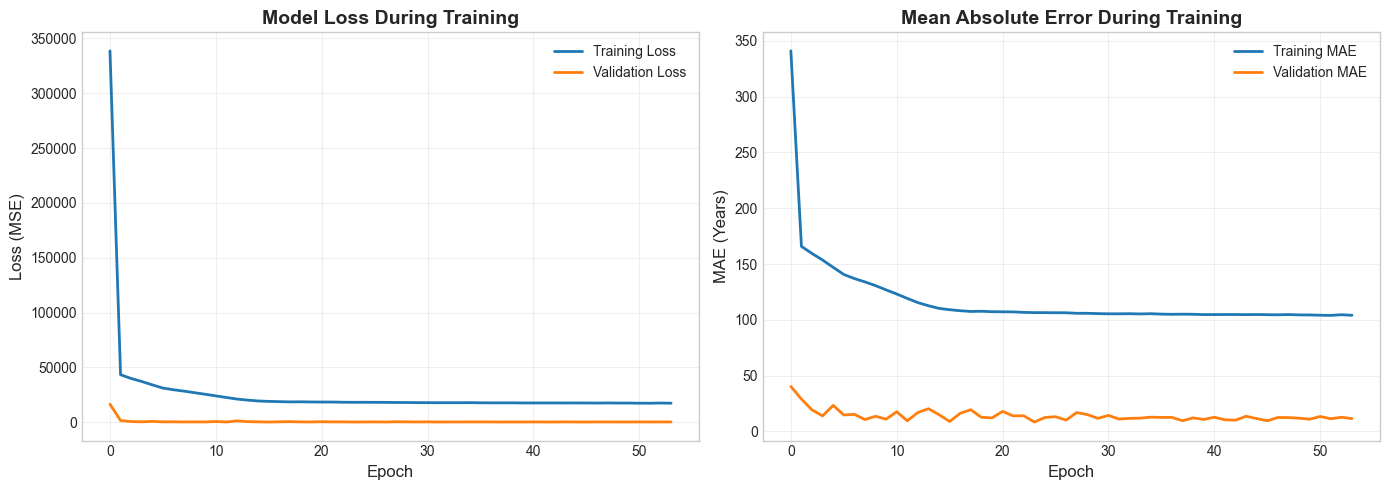

Observation: The training curves show how the model learns over epochs.


In [34]:
# 8.3 Visualize Training History
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss plot
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].set_title('Model Loss During Training', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MAE plot
axes[1].plot(history.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('MAE (Years)', fontsize=12)
axes[1].set_title('Mean Absolute Error During Training', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Observation: The training curves show how the model learns over epochs.")

In [37]:
# 8.4 Evaluate Neural Network
print("=" * 60)
print("NEURAL NETWORK EVALUATION")
print("=" * 60)

# Make predictions
y_train_pred_nn = nn_model.predict(X_train_selected, verbose=0).flatten()
y_val_pred_nn = nn_model.predict(X_val_selected, verbose=0).flatten()

# Calculate metrics for training set
train_mse_nn = mean_squared_error(y_train, y_train_pred_nn)
train_rmse_nn = np.sqrt(train_mse_nn)
train_mae_nn = mean_absolute_error(y_train, y_train_pred_nn)
train_r2_nn = r2_score(y_train, y_train_pred_nn)

# Calculate metrics for validation set
val_mse_nn = mean_squared_error(y_val, y_val_pred_nn)
val_rmse_nn = np.sqrt(val_mse_nn)
val_mae_nn = mean_absolute_error(y_val, y_val_pred_nn)
val_r2_nn = r2_score(y_val, y_val_pred_nn)

print(f"\nTraining Metrics:")
print(f"   MSE:  {train_mse_nn:.4f}")
print(f"   RMSE: {train_rmse_nn:.4f}")
print(f"   MAE:  {train_mae_nn:.4f}")
print(f"   R2:   {train_r2_nn:.4f}")

print(f"\nValidation Metrics:")
print(f"   MSE:  {val_mse_nn:.4f}")
print(f"   RMSE: {val_rmse_nn:.4f}")
print(f"   MAE:  {val_mae_nn:.4f}")
print(f"   R2:   {val_r2_nn:.4f}")

# Remove old NN results if exists and add new one
ml_results = [r for r in ml_results if r['Model'] != 'Neural Network (MLP)']

nn_results = {
    'Model': 'Neural Network (MLP)',
    'Train_MSE': train_mse_nn,
    'Train_RMSE': train_rmse_nn,
    'Train_MAE': train_mae_nn,
    'Train_R2': train_r2_nn,
    'Val_MSE': val_mse_nn,
    'Val_RMSE': val_rmse_nn,
    'Val_MAE': val_mae_nn,
    'Val_R2': val_r2_nn,
    'Predictions': y_val_pred_nn
}
ml_results.append(nn_results)

print(f"\n✅ Results updated! Total models: {len(ml_results)}")

NEURAL NETWORK EVALUATION

Training Metrics:
   MSE:  108.1624
   RMSE: 10.4001
   MAE:  8.3667
   R2:   0.0963

Validation Metrics:
   MSE:  108.0672
   RMSE: 10.3955
   MAE:  8.3560
   R2:   0.0895

✅ Results updated! Total models: 5


## 9. Model Comparison


In [38]:
# 9.1 Create Comparison Table
print("=" * 60)
print("MODEL COMPARISON TABLE")
print("=" * 60)

# Create comparison DataFrame using Polars
comparison_pl = pl.DataFrame(ml_results).select([
    'Model', 'Val_MSE', 'Val_RMSE', 'Val_MAE', 'Val_R2'
])
comparison_pl = comparison_pl.rename({
    'Val_MSE': 'MSE', 
    'Val_RMSE': 'RMSE', 
    'Val_MAE': 'MAE', 
    'Val_R2': 'R2 Score'
})

# Sort by RMSE (lower is better)
comparison_pl = comparison_pl.sort('RMSE')

# Convert to pandas for compatibility with visualization code
comparison_df = comparison_pl.to_pandas()

# Display the comparison table
print("\nValidation Set Performance (Sorted by RMSE):")
print("-" * 80)
print(comparison_pl)
print("-" * 80)

# Identify best model
best_model_idx = comparison_df['RMSE'].idxmin()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_rmse = comparison_df.loc[best_model_idx, 'RMSE']
best_r2 = comparison_df.loc[best_model_idx, 'R2 Score']

print(f"\nBEST MODEL: {best_model_name}")
print(f"   - RMSE: {best_rmse:.4f} years")
print(f"   - R2 Score: {best_r2:.4f}")

MODEL COMPARISON TABLE

Validation Set Performance (Sorted by RMSE):
--------------------------------------------------------------------------------
shape: (5, 5)
┌──────────────────────────┬────────────┬───────────┬──────────┬──────────┐
│ Model                    ┆ MSE        ┆ RMSE      ┆ MAE      ┆ R2 Score │
│ ---                      ┆ ---        ┆ ---       ┆ ---      ┆ ---      │
│ str                      ┆ f64        ┆ f64       ┆ f64      ┆ f64      │
╞══════════════════════════╪════════════╪═══════════╪══════════╪══════════╡
│ Gradient Boosting (Hist) ┆ 83.828354  ┆ 9.155783  ┆ 6.500885 ┆ 0.293705 │
│ Random Forest            ┆ 84.896759  ┆ 9.213944  ┆ 6.616247 ┆ 0.284703 │
│ Ridge Regression         ┆ 95.283749  ┆ 9.76134   ┆ 7.112689 ┆ 0.197188 │
│ Linear Regression        ┆ 95.283856  ┆ 9.761345  ┆ 7.112713 ┆ 0.197187 │
│ Neural Network (MLP)     ┆ 108.067184 ┆ 10.395537 ┆ 8.356014 ┆ 0.089481 │
└──────────────────────────┴────────────┴───────────┴──────────┴──────────┘


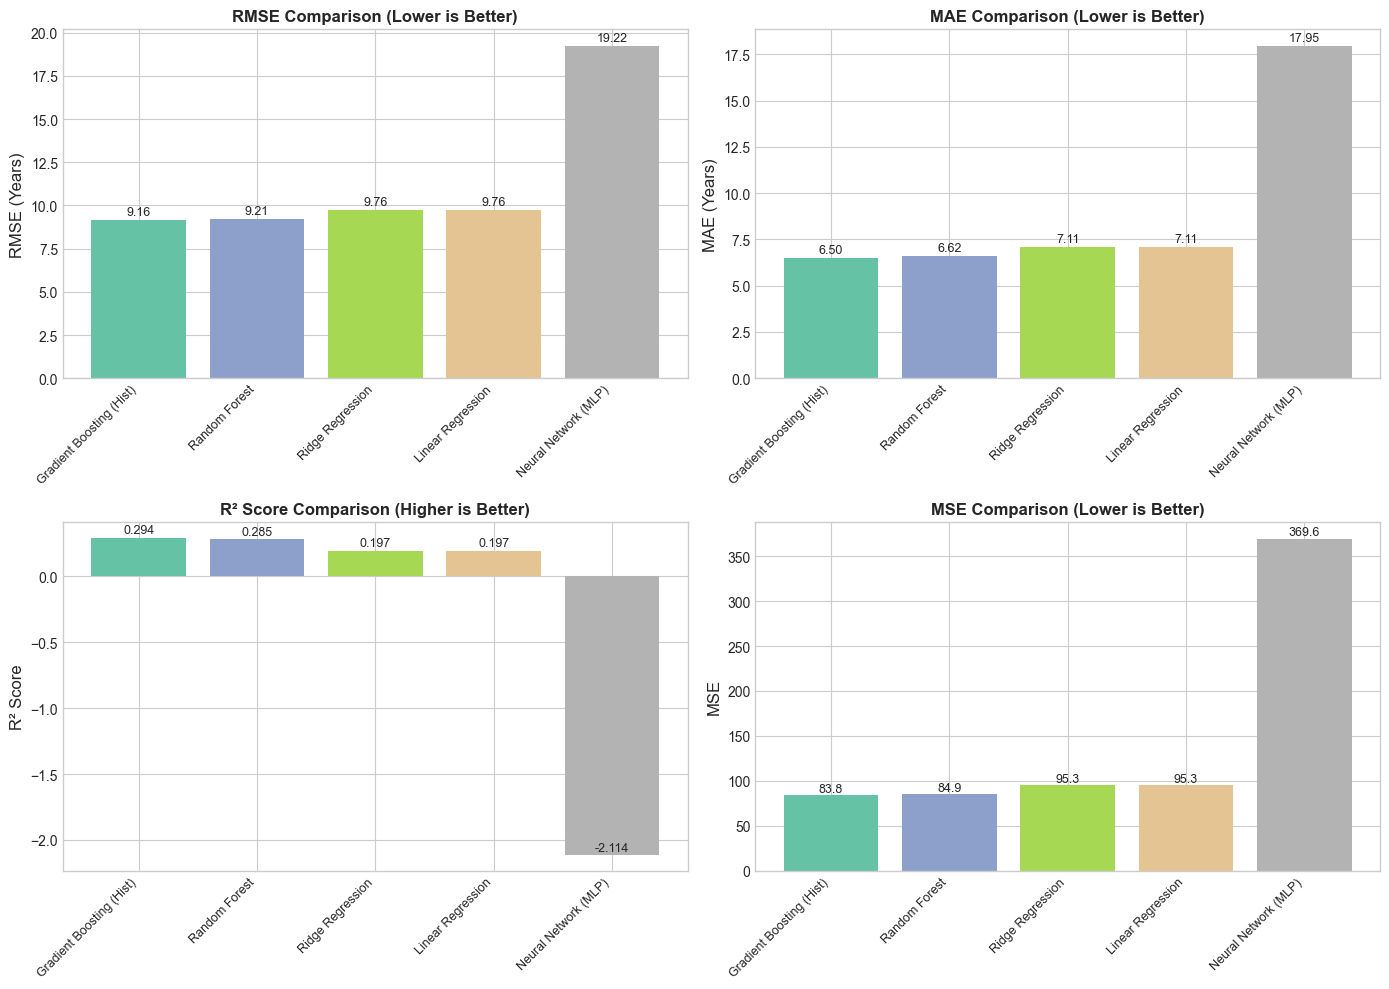

In [26]:
# 9.2 Visualize Model Comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

models = comparison_df['Model'].tolist()
colors = plt.cm.Set2(np.linspace(0, 1, len(models)))

# RMSE Comparison
ax1 = axes[0, 0]
bars1 = ax1.bar(range(len(models)), comparison_df['RMSE'].values, color=colors)
ax1.set_xticks(range(len(models)))
ax1.set_xticklabels(models, rotation=45, ha='right', fontsize=9)
ax1.set_ylabel('RMSE (Years)', fontsize=12)
ax1.set_title('RMSE Comparison (Lower is Better)', fontsize=12, fontweight='bold')
for bar, val in zip(bars1, comparison_df['RMSE'].values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# MAE Comparison
ax2 = axes[0, 1]
bars2 = ax2.bar(range(len(models)), comparison_df['MAE'].values, color=colors)
ax2.set_xticks(range(len(models)))
ax2.set_xticklabels(models, rotation=45, ha='right', fontsize=9)
ax2.set_ylabel('MAE (Years)', fontsize=12)
ax2.set_title('MAE Comparison (Lower is Better)', fontsize=12, fontweight='bold')
for bar, val in zip(bars2, comparison_df['MAE'].values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# R² Score Comparison
ax3 = axes[1, 0]
bars3 = ax3.bar(range(len(models)), comparison_df['R2 Score'].values, color=colors)
ax3.set_xticks(range(len(models)))
ax3.set_xticklabels(models, rotation=45, ha='right', fontsize=9)
ax3.set_ylabel('R² Score', fontsize=12)
ax3.set_title('R² Score Comparison (Higher is Better)', fontsize=12, fontweight='bold')
for bar, val in zip(bars3, comparison_df['R2 Score'].values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{val:.3f}', ha='center', va='bottom', fontsize=9)

# MSE Comparison
ax4 = axes[1, 1]
bars4 = ax4.bar(range(len(models)), comparison_df['MSE'].values, color=colors)
ax4.set_xticks(range(len(models)))
ax4.set_xticklabels(models, rotation=45, ha='right', fontsize=9)
ax4.set_ylabel('MSE', fontsize=12)
ax4.set_title('MSE Comparison (Lower is Better)', fontsize=12, fontweight='bold')
for bar, val in zip(bars4, comparison_df['MSE'].values):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{val:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

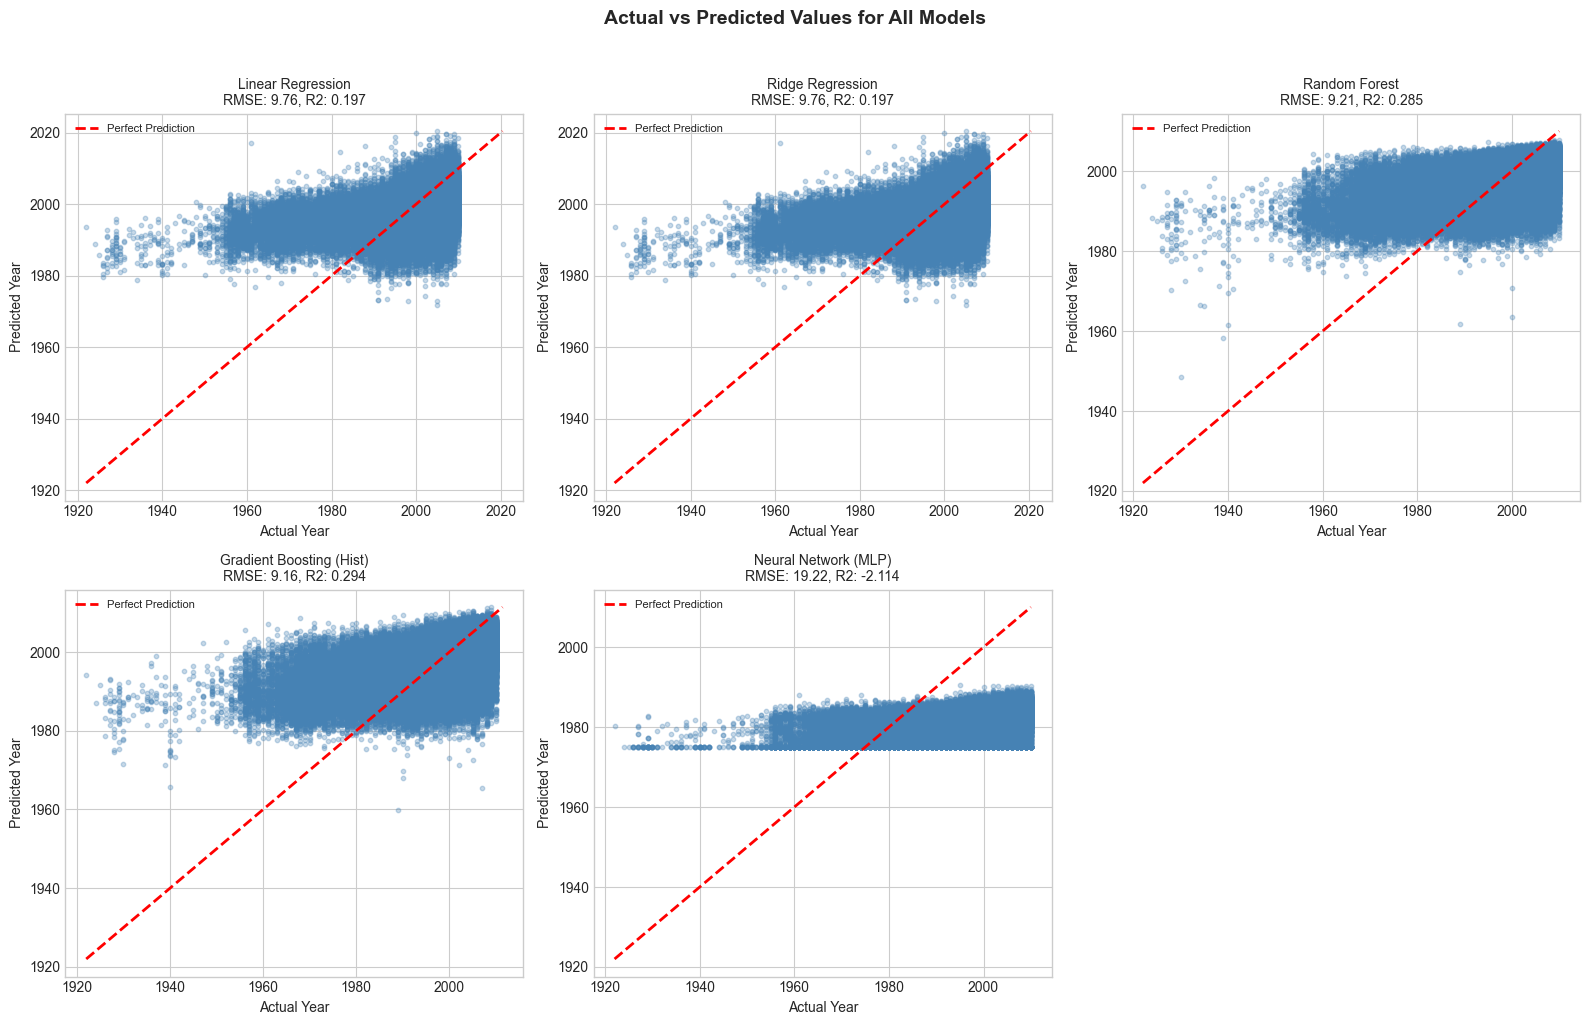

Observation: Points closer to the red line indicate better predictions.


In [27]:
# 9.3 Prediction vs Actual Comparison for All Models
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, result in enumerate(ml_results):
    ax = axes[idx]
    y_pred = result['Predictions']
    
    # Scatter plot
    ax.scatter(y_val, y_pred, alpha=0.3, s=10, color='steelblue')
    
    # Perfect prediction line
    min_val = min(y_val.min(), y_pred.min())
    max_val = max(y_val.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    
    ax.set_xlabel('Actual Year', fontsize=10)
    ax.set_ylabel('Predicted Year', fontsize=10)
    ax.set_title(f"{result['Model']}\nRMSE: {result['Val_RMSE']:.2f}, R2: {result['Val_R2']:.3f}", fontsize=10)
    ax.legend(loc='upper left', fontsize=8)

# Hide the 6th subplot if we only have 5 models
if len(ml_results) < 6:
    axes[5].set_visible(False)

plt.suptitle('Actual vs Predicted Values for All Models', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Observation: Points closer to the red line indicate better predictions.")

In [39]:
# 9.3 CONCLUSION: Best Model Selection
print("=" * 70)
print("🏆 KESIMPULAN: MODEL TERBAIK")
print("=" * 70)

# Find best model based on different metrics
best_by_rmse = comparison_df.loc[comparison_df['RMSE'].idxmin()]
best_by_r2 = comparison_df.loc[comparison_df['R2 Score'].idxmax()]
best_by_mae = comparison_df.loc[comparison_df['MAE'].idxmin()]

print("\n📊 RANKING BERDASARKAN RMSE (Lower is Better):")
print("-" * 50)
for i, (_, row) in enumerate(comparison_df.sort_values('RMSE').iterrows(), 1):
    marker = "⭐" if i == 1 else "  "
    print(f"{marker} {i}. {row['Model']:<30} RMSE: {row['RMSE']:.4f}")

print("\n📊 RANKING BERDASARKAN R² SCORE (Higher is Better):")
print("-" * 50)
for i, (_, row) in enumerate(comparison_df.sort_values('R2 Score', ascending=False).iterrows(), 1):
    marker = "⭐" if i == 1 else "  "
    print(f"{marker} {i}. {row['Model']:<30} R²: {row['R2 Score']:.4f}")

print("\n" + "=" * 70)
print("🎯 MODEL TERBAIK KESELURUHAN")
print("=" * 70)

# Overall best model (based on RMSE - most common metric for regression)
best_model = best_by_rmse
print(f"""
   MODEL      : {best_model['Model']}
   
   PERFORMA:
   ├── RMSE      : {best_model['RMSE']:.4f} tahun (error prediksi rata-rata)
   ├── MAE       : {best_model['MAE']:.4f} tahun (kesalahan absolut rata-rata)
   ├── MSE       : {best_model['MSE']:.4f}
   └── R² Score  : {best_model['R2 Score']:.4f} ({best_model['R2 Score']*100:.2f}% variance explained)

   INTERPRETASI:
   → Model {best_model['Model']} dapat memprediksi tahun rilis lagu
     dengan rata-rata kesalahan sekitar {best_model['RMSE']:.2f} tahun.
   → Model menjelaskan {best_model['R2 Score']*100:.2f}% variasi dalam data.
""")

print("=" * 70)

# Store best result for final summary
best_result = {
    'Model': best_model['Model'],
    'Val_RMSE': best_model['RMSE'],
    'Val_MAE': best_model['MAE'],
    'Val_MSE': best_model['MSE'],
    'Val_R2': best_model['R2 Score']
}

🏆 KESIMPULAN: MODEL TERBAIK

📊 RANKING BERDASARKAN RMSE (Lower is Better):
--------------------------------------------------
⭐ 1. Gradient Boosting (Hist)       RMSE: 9.1558
   2. Random Forest                  RMSE: 9.2139
   3. Ridge Regression               RMSE: 9.7613
   4. Linear Regression              RMSE: 9.7613
   5. Neural Network (MLP)           RMSE: 10.3955

📊 RANKING BERDASARKAN R² SCORE (Higher is Better):
--------------------------------------------------
⭐ 1. Gradient Boosting (Hist)       R²: 0.2937
   2. Random Forest                  R²: 0.2847
   3. Ridge Regression               R²: 0.1972
   4. Linear Regression              R²: 0.1972
   5. Neural Network (MLP)           R²: 0.0895

🎯 MODEL TERBAIK KESELURUHAN

   MODEL      : Gradient Boosting (Hist)

   PERFORMA:
   ├── RMSE      : 9.1558 tahun (error prediksi rata-rata)
   ├── MAE       : 6.5009 tahun (kesalahan absolut rata-rata)
   ├── MSE       : 83.8284
   └── R² Score  : 0.2937 (29.37% variance explai

## 10. Results Interpretation



In [28]:
# 10.1 Detailed Results Interpretation
print("=" * 70)
print("DETAILED RESULTS INTERPRETATION")
print("=" * 70)

# Get best model results
best_result = [r for r in ml_results if r['Model'] == best_model_name][0]

print(f"\nBest Performing Model: {best_model_name}")
print("-" * 50)

print(f"\nPerformance Metrics Interpretation:")
print(f"""
1. Mean Squared Error (MSE): {best_result['Val_MSE']:.4f}
   -> The average squared difference between predictions and actual values
   -> Penalizes larger errors more heavily

2. Root Mean Squared Error (RMSE): {best_result['Val_RMSE']:.4f} years
   -> On average, predictions are off by ~{best_result['Val_RMSE']:.1f} years
   -> Same unit as the target variable (years)

3. Mean Absolute Error (MAE): {best_result['Val_MAE']:.4f} years
   -> Average absolute prediction error
   -> On average, predictions deviate by ~{best_result['Val_MAE']:.1f} years

4. R2 Score: {best_result['Val_R2']:.4f}
   -> Model explains {best_result['Val_R2']*100:.1f}% of the variance in release years
   -> 1.0 would be perfect prediction, 0.0 would be no better than mean prediction
""")

# Residual Analysis for best model
y_val_pred_best = best_result['Predictions']
residuals = y_val - y_val_pred_best

print(f"\nResidual Analysis:")
print(f"   Mean Residual: {residuals.mean():.4f}")
print(f"   Std Residual: {residuals.std():.4f}")
print(f"   Min Residual: {residuals.min():.4f}")
print(f"   Max Residual: {residuals.max():.4f}")

DETAILED RESULTS INTERPRETATION

Best Performing Model: Gradient Boosting (Hist)
--------------------------------------------------

Performance Metrics Interpretation:

1. Mean Squared Error (MSE): 83.8284
   -> The average squared difference between predictions and actual values
   -> Penalizes larger errors more heavily

2. Root Mean Squared Error (RMSE): 9.1558 years
   -> On average, predictions are off by ~9.2 years
   -> Same unit as the target variable (years)

3. Mean Absolute Error (MAE): 6.5009 years
   -> Average absolute prediction error
   -> On average, predictions deviate by ~6.5 years

4. R2 Score: 0.2937
   -> Model explains 29.4% of the variance in release years
   -> 1.0 would be perfect prediction, 0.0 would be no better than mean prediction


Residual Analysis:
   Mean Residual: 0.0432
   Std Residual: 9.1557
   Min Residual: -72.1547
   Max Residual: 41.6315


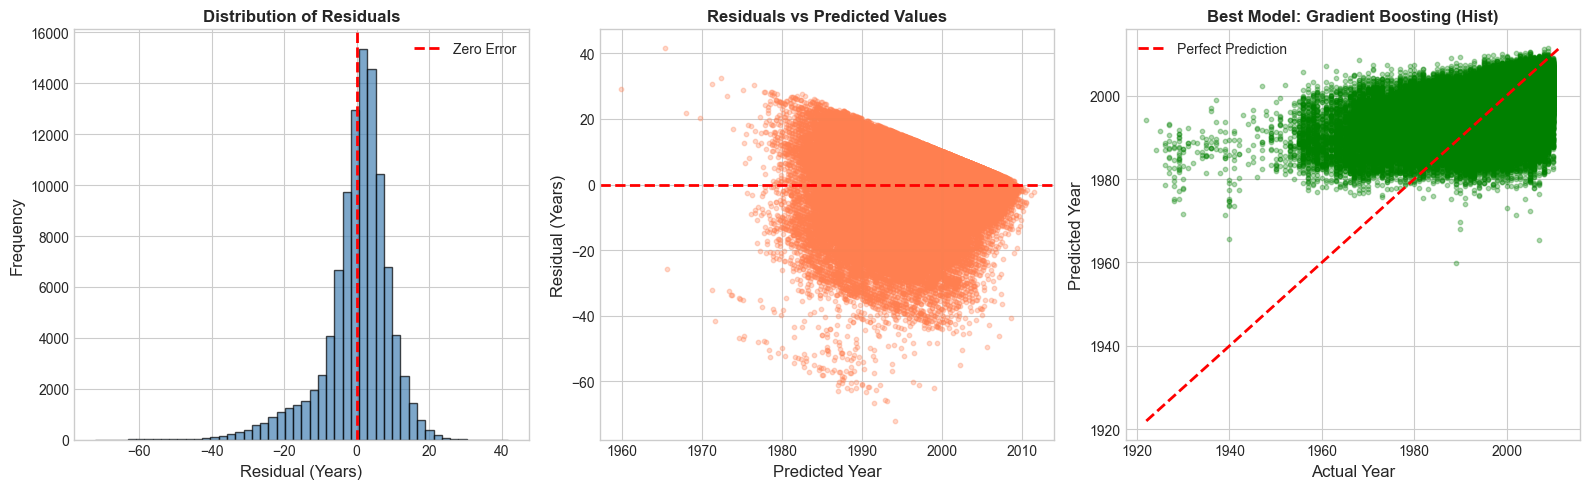


Interpretation:
   - Residuals should be normally distributed around 0
   - No pattern in residuals vs predictions indicates good fit
   - Points close to the diagonal line indicate accurate predictions


In [29]:
# 10.2 Residual Visualization for Best Model
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Residual Distribution
axes[0].hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0].set_xlabel('Residual (Years)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Residuals', fontsize=12, fontweight='bold')
axes[0].legend()

# Residuals vs Predicted
axes[1].scatter(y_val_pred_best, residuals, alpha=0.3, s=10, color='coral')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Year', fontsize=12)
axes[1].set_ylabel('Residual (Years)', fontsize=12)
axes[1].set_title('Residuals vs Predicted Values', fontsize=12, fontweight='bold')

# Actual vs Predicted (Best Model)
axes[2].scatter(y_val, y_val_pred_best, alpha=0.3, s=10, color='green')
min_val = min(y_val.min(), y_val_pred_best.min())
max_val = max(y_val.max(), y_val_pred_best.max())
axes[2].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[2].set_xlabel('Actual Year', fontsize=12)
axes[2].set_ylabel('Predicted Year', fontsize=12)
axes[2].set_title(f'Best Model: {best_model_name}', fontsize=12, fontweight='bold')
axes[2].legend()

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("   - Residuals should be normally distributed around 0")
print("   - No pattern in residuals vs predictions indicates good fit")
print("   - Points close to the diagonal line indicate accurate predictions")

## 11. Conclusion

### Summary of the Regression Pipeline

This project implemented a complete end-to-end regression pipeline for predicting song release years from audio features.

In [30]:
# Final Summary
print("=" * 70)
print("FINAL PROJECT SUMMARY")
print("=" * 70)

print(f"""
OBJECTIVE:
   Predict song release years from numerical audio features

DATASET:
   - Source: finalterm-regresi-dataset.csv
   - Samples: {df.shape[0]}
   - Features: {df.shape[1] - 1} audio features
   - Target: Release Year
   - Data Processing: Polars (for faster large dataset handling)

PREPROCESSING STEPS:
   1. Missing value handling (median imputation)
   2. Outlier handling (Z-score clipping)
   3. Feature scaling (StandardScaler)
   4. Train-test split (80-20)
   5. Feature selection (SelectKBest with F-regression)

MODELS TRAINED:
   1. Linear Regression (Baseline)
   2. Ridge Regression (L2 Regularization)
   3. Random Forest Regressor (Ensemble)
   4. Gradient Boosting Regressor (Boosting)
   5. Neural Network / MLP (Deep Learning)

BEST MODEL: {best_model_name}
   - RMSE: {best_result['Val_RMSE']:.4f} years
   - MAE: {best_result['Val_MAE']:.4f} years
   - R2 Score: {best_result['Val_R2']:.4f}
""")

print("=" * 70)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 70)

FINAL PROJECT SUMMARY

OBJECTIVE:
   Predict song release years from numerical audio features

DATASET:
   - Source: finalterm-regresi-dataset.csv
   - Samples: 515344
   - Features: 90 audio features
   - Target: Release Year
   - Data Processing: Polars (for faster large dataset handling)

PREPROCESSING STEPS:
   1. Missing value handling (median imputation)
   2. Outlier handling (Z-score clipping)
   3. Feature scaling (StandardScaler)
   4. Train-test split (80-20)
   5. Feature selection (SelectKBest with F-regression)

MODELS TRAINED:
   1. Linear Regression (Baseline)
   2. Ridge Regression (L2 Regularization)
   3. Random Forest Regressor (Ensemble)
   4. Gradient Boosting Regressor (Boosting)
   5. Neural Network / MLP (Deep Learning)

BEST MODEL: Gradient Boosting (Hist)
   - RMSE: 9.1558 years
   - MAE: 6.5009 years
   - R2 Score: 0.2937

PROJECT COMPLETED SUCCESSFULLY!
